<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# Check keras and tensorflow versions

import keras
import tensorflow as tf

print('Keras version: ', keras.__version__)
print('Tensorflow version: ', tf.__version__)

Keras version:  2.4.3
Tensorflow version:  2.3.0


In [3]:
## Import Libraries

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [4]:
# insert code here

diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [6]:
# insert code here

X = diabetes.data
n_cols = X.shape[1]

y = diabetes.target
print('Number of columns is ', n_cols)

Number of columns is  10


In [7]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

def relu_derivative(x):
    return 0 if x < 0 else 1

### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65
)

### Create the model's architecture

In [9]:
# Setting training iterations
epoch = 1000
# Setting learning rate
lr = 0.1
# number of features in data set
input_layer_size = n_cols 
# number of hidden layers neurons
hidden_layer_1_size = 3
# number of neurons at output layer
output_layer_size = 1

In [10]:
# insert code here
model = Sequential()
model.add(Dense(1000, activation = 'relu', input_shape = (10,)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(125, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              11000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8064      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 676,254
Trainable params: 676,254
Non-trainable params: 0
__________________________________________________

### Compile the model

In [11]:
# insert code here
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mse']
             )

### Fit the training data

In [12]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [13]:
X_train_res, y_train_res = shuffle(X_train, y_train, random_state = 42)

In [14]:
%%time
# insert code here
history = model.fit(X_train_res, y_train_res,
                    validation_split = 0.25,
                    batch_size = 10,
                    epochs = epoch,
                    verbose = 0
                   )

Wall time: 58.8 s


### Create predictions

In [15]:
# insert code here
predict_x = model.predict(X_test)
predictions = np.argmax(predict_x, axis = 1)

### Evaluate the model

In [16]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\n Test loss: %.6f' % score[0])

5/5 [==============================] - 0s 599us/step - loss: 5036.3477 - mse: 5036.3477

 Test loss: 5036.347656


### Visualisation of cost

In [17]:
history.history

{'loss': [25898.15625,
  5630.87646484375,
  3459.978271484375,
  3144.690185546875,
  3568.423095703125,
  3036.0,
  3583.552490234375,
  2958.02294921875,
  2803.291015625,
  3243.699462890625,
  2823.89990234375,
  2816.40478515625,
  2872.456787109375,
  2850.471923828125,
  2842.20166015625,
  2914.81005859375,
  3088.161376953125,
  2952.87744140625,
  2991.134765625,
  2757.140380859375,
  2854.883544921875,
  2779.096923828125,
  2806.74609375,
  3006.032958984375,
  2886.928466796875,
  2593.67431640625,
  2704.62744140625,
  2783.505615234375,
  2626.44287109375,
  2875.6318359375,
  2796.894775390625,
  2727.033935546875,
  2671.899169921875,
  2589.570068359375,
  2716.01171875,
  2683.0498046875,
  2804.161865234375,
  2618.1845703125,
  2762.08642578125,
  2517.302001953125,
  2628.09326171875,
  2590.244140625,
  2708.982666015625,
  2564.21826171875,
  2722.25732421875,
  2718.47265625,
  2496.1767578125,
  2524.505859375,
  2600.567626953125,
  2852.5078125,
  2563.284

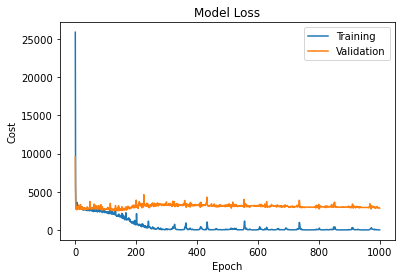

In [18]:
# insert code here
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Model Loss')
plt.legend()

plt.show()

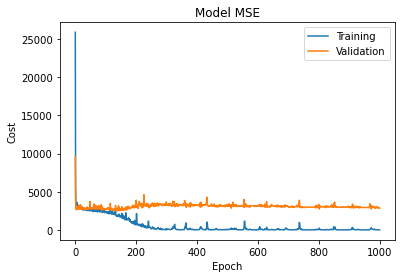

In [19]:
# insert code here
plt.plot(history.history['mse'], label = 'Training')
plt.plot(history.history['val_mse'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Model MSE')
plt.legend()

plt.show()

### Visualisation of residuals

In [20]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predict_x)
n, p = X.shape
adjusted_r2 = 1 - ( 1 - r2 ) * ((n - 1) / (n - p - 1))

In [21]:
print(r2)

0.16705735661742294


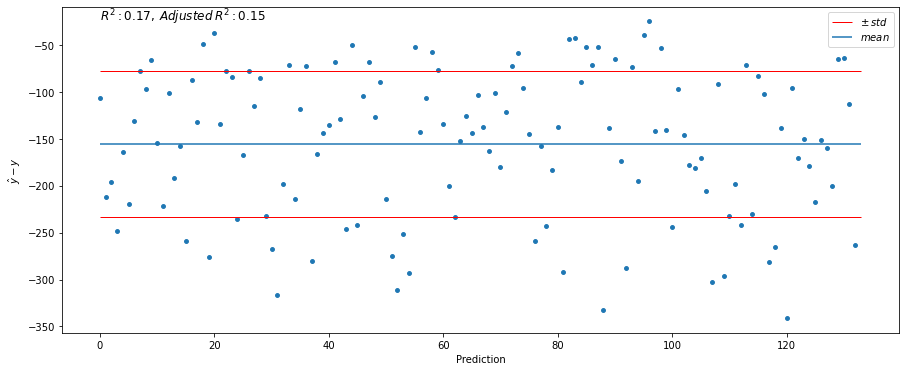

In [22]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predict_x)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0,difference.max() * 0.95,
          '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
          fontsize = 12
         )
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



